# Data Preprocessing - Stage 2

## Import Library

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from scipy import stats
import scipy as sp
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif,chi2

import warnings
warnings.simplefilter("ignore")

## Load Dataset

In [ ]:
#Mengimput dataset TravelInsurancePrediction.csv
url='https://drive.google.com/file/d/1hDfrC_4mjz5Ps24h8pzUiD8PShSQwiRh/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

## 1. Data Cleansing

In [ ]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
#Target dari dataset TravelInsurancePrediction.csv
target = 'TravelInsurance'

In [ ]:
#Pengelompokan kolom berdasarkan tipe datanya
cats = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad', 'ChronicDiseases', 'TravelInsurance']
nums = ['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers']

In [ ]:
#Cek deskripsi statistika untuk tipe data numeric
df[nums].describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers
count,1987.000000,1987.000000,1.987000e+03,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894
std,573.741812,2.913308,3.768557e+05,1.609650
min,0.000000,25.000000,3.000000e+05,2.000000
25%,496.500000,28.000000,6.000000e+05,4.000000
50%,993.000000,29.000000,9.000000e+05,5.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000
max,1986.000000,35.000000,1.800000e+06,9.000000


Kolom **`Unnamed: 0`**  memiliki jumlah unique values yang tinggi (1987). Tampaknya kita perlu exclude fitur ini dari dataset untuk pemodelan.

In [ ]:
#Cek deskripsi statistika untuk tipe data kategorik
df[cats].describe(include="object")

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


In [ ]:
#Cek nunique untuk masing-masing tipe data dalam dataset

for i in df.columns:
  print(df[i].unique())

[   0    1    2 ... 1984 1985 1986]
[31 34 28 25 33 26 32 29 35 30 27]
['Government Sector' 'Private Sector/Self Employed']
['Yes' 'No']
[ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]
[6 7 4 3 8 9 5 2]
[1 0]
['No' 'Yes']
['No' 'Yes']
[0 1]


### 1.a. Handle Missing Values

In [ ]:
#Identifikasi missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Pengamatan :

1. Data terdiri dari 1987 baris.
2. Tidak ada data yang memiliki nilai null/missing value (Non-Null Count = jumlah baris).
3. Kolom **`CronicDiseases`** memiliki value yang bersifat kategorikal namun bertipe integer.

In [ ]:
#Identifikasi data null
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Tidak terdapat nilai yang hilang atau tidak lengkap dalam dataset ini, sehingga tidak perlu dilakukan imputation.

### 1.b. Handle Duplicated Data

In [ ]:
#Identifikasi data duplikat
df.duplicated().sum()

0

In [ ]:
df.duplicated().any()

False

Tidak terdapat nilai yang duplikat dalam dataset ini.

### 1.c. Handle Outliers

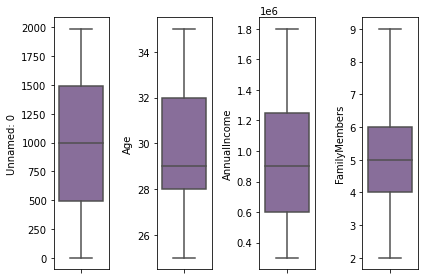

In [ ]:
#Box plot untuk melihat outliers
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y = df[nums[i]], color = '#8967A1', orient = 'v')
    plt.tight_layout()

In [ ]:
#Deteksi outlier menggunakan IQR dan menghapus data yang dianggap sebagai outlier
print('Deteksi outlier menggunakan IQR =')
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in nums:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Deteksi outlier menggunakan IQR =
Jumlah baris sebelum memfilter outlier: 1987
Jumlah baris setelah memfilter outlier: 1987


In [ ]:
#Deteksi outlier menggunakan z-score dan menghapus data yang dianggap sebagai outlier
print('Deteksi outlier menggunakan z-score =')
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in nums:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Deteksi outlier menggunakan z-score =
Jumlah baris sebelum memfilter outlier: 1987
Jumlah baris setelah memfilter outlier: 1987


Tidak terdapat nilai outliers pada dataset ini, sehingga jumlah baris sebelum dan setelah  difilter tetap sama yaitu 1987.

### 1.d. Feature Transformation

- Mengubah tipe data kolom **`CronicDiseases`**

In [ ]:
#Menampilkan tipe data kolom 'ChronicDiseases' sebelum diubah
print("Tipe data kolom 'ChronicDiseases' sebelum diubah =", df['ChronicDiseases'].dtypes)

#Mengubah tipe data kolom 'ChronicDiseases' menjadi object
df['ChronicDiseases'] = df['ChronicDiseases'].astype('object')

#Menampilkan tipe data kolom 'ChronicDiseases' setelah diubah
print("Tipe data kolom 'ChronicDiseases' setelah diubah =", df['ChronicDiseases'].dtypes)

Tipe data kolom 'ChronicDiseases' sebelum diubah = int64
Tipe data kolom 'ChronicDiseases' setelah diubah = object


In [ ]:
#Cek kembali tipe data 'CronicDiseases' setelah diubah
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   object
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 170.8+ KB


- Melakukan Scalling pada Kolom **`AnnualIncome`**

In [ ]:
#Inisialisasi objek scaler
scaler = MinMaxScaler()

#Penskalaan kolom 'AnnualIncome'
df['AnnualIncome_scaled'] = scaler.fit_transform(df[['AnnualIncome']])

#Hapus kolom AnnualIncome asli
#df.drop(['AnnualIncome'], axis=1, inplace=True)

#Cetak data
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_scaled
0,0,31,Government Sector,Yes,400000,6,1,No,No,0,0.066667
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,0.633333
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,0.133333
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,0.266667
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,0.266667


In [ ]:
df['AnnualIncome_scaled'].describe()

count    1987.000000
mean        0.421842
std         0.251237
min         0.000000
25%         0.200000
50%         0.400000
75%         0.633333
max         1.000000
Name: AnnualIncome_scaled, dtype: float64

- Melakukan Log Transformation pada kolom **`Age`** dan **`FamilyMembers`**

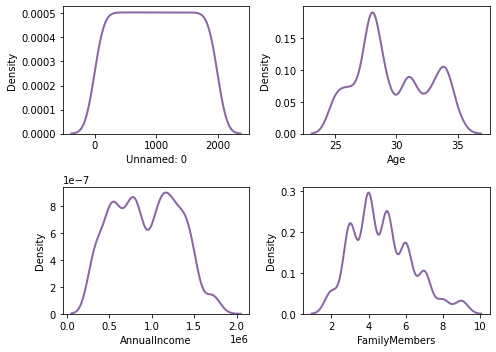

In [ ]:
#Distribusi kolom numerik
features = nums
plt.figure(figsize = (7, 5))
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.kdeplot(x = df[features[i]], color = '#8967A1', lw = 2)
    plt.xlabel(features[i])
    plt.tight_layout()

Pengamatan :


*   **`AnnualIncome`** : Tampak terdistribusi normal.
*   **`Age`** : Tampaknya skew ke kanan (long-right tail), mungkin dapat dilakukan transformasi log.
*   **`FamilyMembers`** : Tampaknya skew ke kanan (long-right tail), mungkin dapat dilakukan transformasi log.

<Axes: xlabel='FamilyMembers', ylabel='Density'>

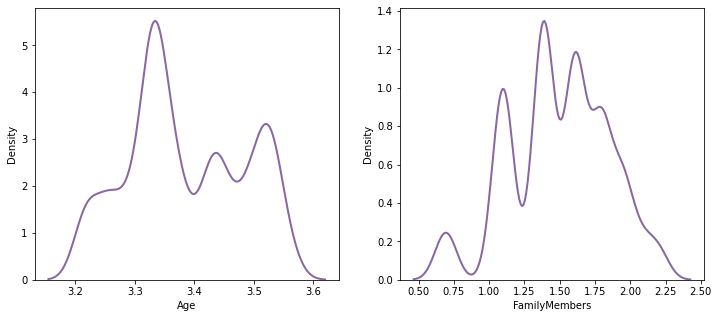

In [ ]:
#Distribusi kolom 'Age' dan kolom 'FamilyMembers' (setelah log transformation)
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.kdeplot(np.log(df['Age']), color = '#8967A1', lw = 2, ax = ax[0])
sns.kdeplot(np.log(df['FamilyMembers']), color = '#8967A1', lw = 2, ax = ax[1])

- Melakukan Standardization pada kolom **`Age`** dan **`FamilyMembers`**


In [ ]:
df[['Age', 'FamilyMembers']].describe()

,Age,FamilyMembers
count,1987.000000,1987.000000
mean,29.650226,4.752894
std,2.913308,1.609650
min,25.000000,2.000000
25%,28.000000,4.000000
50%,29.000000,5.000000
75%,32.000000,6.000000
max,35.000000,9.000000


In [ ]:
#Kolom 'Age' dan 'FamilyMembers' dilakukan re-scale ke [0,1]
df['Age_norm'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
df['FamilyMembers_norm'] = MinMaxScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df), 1))

#Kolom 'Age' dan 'FamilyMembers' dilakukan standarisasi (karena distribusi datanya sudah mendekati normal)
df['Age_std'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
df['FamilyMembers_std'] = StandardScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df), 1))

In [ ]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,TravelInsurance,AnnualIncome_scaled,Age_norm,FamilyMembers_norm,Age_std,FamilyMembers_std
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1.987000e+03
mean,993.000000,29.650226,9.327630e+05,4.752894,0.357323,0.421842,0.465023,0.393271,-6.333915e-16,-1.609181e-16
std,573.741812,2.913308,3.768557e+05,1.609650,0.479332,0.251237,0.291331,0.229950,1.000252e+00,1.000252e+00
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,-1.596603e+00,-1.710675e+00
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.200000,0.300000,0.285714,-5.665868e-01,-4.678554e-01
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.400000,0.400000,0.428571,-2.232480e-01,1.535541e-01
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,0.633333,0.700000,0.571429,8.067684e-01,7.749637e-01
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000,1.836785e+00,2.639192e+00


### 1.e. Feature Encoding

In [ ]:
#Inisialisasi label encoder
le = LabelEncoder()

#Mengkodekan kolom 'GraduateOrNot'
df['GraduateOrNot'] = le.fit_transform(df['GraduateOrNot'])

#Mengkodekan kolom 'FrequentFlyer'
df['FrequentFlyer'] = le.fit_transform(df['FrequentFlyer'])

#Mengkodekan kolom 'EverTravelledAbroad'
df['EverTravelledAbroad'] = le.fit_transform(df['EverTravelledAbroad'])

#Mengkodekan kolom 'Employment Type'
df['Employment Type'] = le.fit_transform(df['Employment Type'])

In [ ]:
#Mengecek perubahan label encoding
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_scaled,Age_norm,FamilyMembers_norm,Age_std,FamilyMembers_std
0,0,31,0,1,400000,6,1,0,0,0,0.066667,0.6,0.571429,0.463430,0.774964
1,1,31,1,1,1250000,7,0,0,0,0,0.633333,0.6,0.714286,0.463430,1.396373
2,2,34,1,1,500000,4,1,0,0,1,0.133333,0.9,0.285714,1.493446,-0.467855
3,3,28,1,1,700000,3,1,0,0,0,0.266667,0.3,0.142857,-0.566587,-1.089265
4,4,28,1,1,700000,8,1,1,0,0,0.266667,0.3,0.857143,-0.566587,2.017783


In [ ]:
dummy_df = pd.get_dummies(df, drop_first = True)
dummy_df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_scaled,Age_norm,FamilyMembers_norm,Age_std,FamilyMembers_std,ChronicDiseases_1
0,0,31,0,1,400000,6,0,0,0,0.066667,0.6,0.571429,0.463430,0.774964,1
1,1,31,1,1,1250000,7,0,0,0,0.633333,0.6,0.714286,0.463430,1.396373,0
2,2,34,1,1,500000,4,0,0,1,0.133333,0.9,0.285714,1.493446,-0.467855,1
3,3,28,1,1,700000,3,0,0,0,0.266667,0.3,0.142857,-0.566587,-1.089265,1
4,4,28,1,1,700000,8,1,0,0,0.266667,0.3,0.857143,-0.566587,2.017783,1


### 1.f. Handle Class Imbalance

In [ ]:
#Menghitung jumlah value dan persentase pada target
value = "TravelInsurance"
print(f"Value count kolom {value}:")
print(df[value].value_counts())
print()
print(f"Persentase kolom {value}:")
print(round(df[value].value_counts([value])*100, 2))

Value count kolom TravelInsurance:
0    1277
1     710
Name: TravelInsurance, dtype: int64

Persentase kolom TravelInsurance:
0    64.27
1    35.73
Name: TravelInsurance, dtype: float64


Distribusi kolom tampak tidak seimbang. jumlah customer yang tidak membeli travel insurance lebih dominan sebanyak 1277 (64.27%)

- Melakukan oversampling metode SMOTE

In [ ]:
#Pemisahan features vs target
x = df.drop(['TravelInsurance'], axis = 1)
y = df['TravelInsurance']

#Membagi dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [ ]:
#Melakukan SMOTE pada train set
sm = SMOTE(random_state = 10)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [ ]:
#Menampilkan jumlah instance pada setiap kelas sebelum dan sesudah SMOTE
print("Sebelum SMOTE:")
print(y_train.value_counts())
print("\nSetelah SMOTE:")
print(y_train_res.value_counts())

Sebelum SMOTE:
0    892
1    498
Name: TravelInsurance, dtype: int64

Setelah SMOTE:
0    892
1    892
Name: TravelInsurance, dtype: int64


## 2. Feature Engineering

### 2.a. Feature Selection

In [ ]:
#Drop Unnamed: 0 karena unique valuesnya terlalu banyak
df = df.drop(columns = 'Unnamed: 0')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1987 non-null   int64  
 1   Employment Type      1987 non-null   int64  
 2   GraduateOrNot        1987 non-null   int64  
 3   AnnualIncome         1987 non-null   int64  
 4   FamilyMembers        1987 non-null   int64  
 5   ChronicDiseases      1987 non-null   object 
 6   FrequentFlyer        1987 non-null   int64  
 7   EverTravelledAbroad  1987 non-null   int64  
 8   TravelInsurance      1987 non-null   int64  
 9   AnnualIncome_scaled  1987 non-null   float64
 10  Age_norm             1987 non-null   float64
 11  FamilyMembers_norm   1987 non-null   float64
 12  Age_std              1987 non-null   float64
 13  FamilyMembers_std    1987 non-null   float64
dtypes: float64(5), int64(8), object(1)
memory usage: 232.9+ KB


In [ ]:
df_cat = df[['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']].copy()
for col in ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']:
  ct = pd.crosstab(df_cat[col], df_cat.TravelInsurance)
  chi, p, dof, expected = stats.chi2_contingency(ct)
  print(f"Column = {col}\nChi2 value = {chi}\np-value = {p}\nDegrees of freedom = {dof}\n")

Column = Employment Type
Chi2 value = 42.75380328896317
p-value = 6.208106601512192e-11
Degrees of freedom = 1

Column = GraduateOrNot
Chi2 value = 0.605510042905726
p-value = 0.4364833842842336
Degrees of freedom = 1

Column = ChronicDiseases
Chi2 value = 0.5754114650274649
p-value = 0.4481165216392011
Degrees of freedom = 1

Column = FrequentFlyer
Chi2 value = 105.85723074203977
p-value = 7.92436041506454e-25
Degrees of freedom = 1

Column = EverTravelledAbroad
Chi2 value = 370.5599281861554
p-value = 1.4134505859999571e-82
Degrees of freedom = 1



In [ ]:
X = df[['Age', 'AnnualIncome', 'FamilyMembers', 'Age_norm', 'Age_std', 'FamilyMembers_norm', 'FamilyMembers_std']].copy()
y = df['TravelInsurance'].copy()
F, pval = f_classif(X,y)

col = ['Age', 'AnnualIncome', 'FamilyMembers', 'Age_norm', 'Age_std', 'FamilyMembers_norm', 'FamilyMembers_std']
for i in range(0, len(col)):
  print(f"Column = {col[i]}\nF-value = {F[i]}\npval = {pval[i]}\n")

Column = Age
F-value = 7.428382125056225
pval = 0.006476683978697062

Column = AnnualIncome
F-value = 370.86229287714644
pval = 6.635017760347684e-76

Column = FamilyMembers
F-value = 12.756575392113366
pval = 0.0003632080073862163

Column = Age_norm
F-value = 7.428382125041942
pval = 0.006476683978748834

Column = Age_std
F-value = 7.4283821250423205
pval = 0.0064766839787472235

Column = FamilyMembers_norm
F-value = 12.756575392111564
pval = 0.00036320800738661536

Column = FamilyMembers_std
F-value = 12.756575392112135
pval = 0.0003632080073864857



In [ ]:
X = df[['Employment Type','GraduateOrNot','ChronicDiseases','FrequentFlyer','EverTravelledAbroad']].copy()
y = df['TravelInsurance'].copy()
select = SelectKBest(score_func = chi2, k = 5)
z = select.fit_transform(X,y)
filter = select.get_support()
features = np.array(X.columns)
print(filter)

[ True  True  True  True  True]


In [ ]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O' and feature != target]

df[num_features].head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,FrequentFlyer,EverTravelledAbroad,AnnualIncome_scaled,Age_norm,FamilyMembers_norm,Age_std,FamilyMembers_std
0,31,0,1,400000,6,0,0,0.066667,0.6,0.571429,0.463430,0.774964
1,31,1,1,1250000,7,0,0,0.633333,0.6,0.714286,0.463430,1.396373
2,34,1,1,500000,4,0,0,0.133333,0.9,0.285714,1.493446,-0.467855
3,28,1,1,700000,3,0,0,0.266667,0.3,0.142857,-0.566587,-1.089265
4,28,1,1,700000,8,1,0,0.266667,0.3,0.857143,-0.566587,2.017783


In [ ]:
X = dummy_df.drop(target, axis = 1)
y = dummy_df[target]

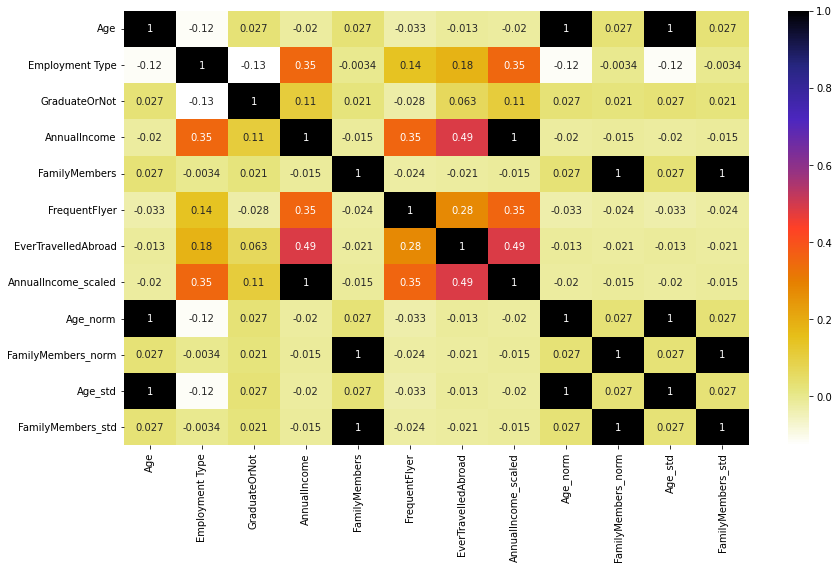

In [ ]:
cor = X[num_features].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

### 2.b. Feature Extraction

Proses feature extraction tidak dilakukan karena tidak ada lagi feature yang bisa dipecah dari data yang tersedia

### 2.c. Feature Additional

Beberapa feature tambahan yang mungkin dapat meningkatkan performance model :


1.   Tujuan Destinasi : kota dan negara tujuan perjalanan untuk melihat kota dan negara yang menjadi segmentasi terbesar bagi customer yang membeli travel insurance. negara dan kota dengan tingkat resiko tinggi mungkin akan berpengaruh terhadap pembelian travel insurance. 
2.   Jenis Perlindungan : individu atau keluarga. untuk melihat kecenderungan customer dalam membeli travel insurance itu biasanya berpergian individu atau berkelompok.
1.   Jenis Perjalanan : domestik atau internasional, untuk melihat jenis perjalanan apa yang menjadi pertimbangan customer dalam membeli travel insurance.
2.   Jenis Polis : sekali jalan/ annual travel insurance. untuk melihat kebiasaan dan pola perjalanan customer. Agar kedepannya dapat dilakukan promosi yang efektif dan tepat.
1.   Waktu Berangkat : untuk melihat apakah ada hubungan jika pemberangkatan dilakukan pada musim tertentu.
1.   Tujuan Perjalanan : perjalanan bisnis atau liburan, untuk melihat kebiasaan dan pola perjalanan customer. Agar kedepannya dapat dilakukan promosi yang efektif dan tepat.
2.   Jenis transportasi :  Jenis transportasi yang digunakan untuk perjalanan, seperti pesawat, kereta, atau mobil, dapat mempengaruhi keputusan untuk membeli asuransi perjalanan.
2.   Harga Travel Insurance untuk mendapatkan prediksi revenue







In [ ]:
df.duplicated().sum()

738